<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 191.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 203.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 174.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 143.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 111.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 164.0 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [57]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head(2)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [58]:
## Write your code here
missing_values = df.isnull().sum().reset_index()
headers = ['column','count']
missing_values.columns = headers
missing_values.sort_values(by='count', ascending=False, inplace=False).reset_index(drop=True)

df = df.dropna(subset=['Employment','JobSat','RemoteWork','YearsCodePro'])

critical_columns = ['Employment','JobSat','RemoteWork','YearsCodePro']
missing_c = df[critical_columns].isnull().sum().reset_index()
missing_c.columns = ['Column', 'MissingValues']
missing_c

,Column,MissingValues
0,Employment,0
1,JobSat,0
2,RemoteWork,0
3,YearsCodePro,0


In [59]:
df['RemoteWork'].unique()

array(['Hybrid (some remote, some in-person)', 'Remote', 'In-person'],
      dtype=object)

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


  ExperienceRange  JobSat
0             0-5     7.0
1           11-20     8.0
2            6-10     7.0
3             >20     8.0


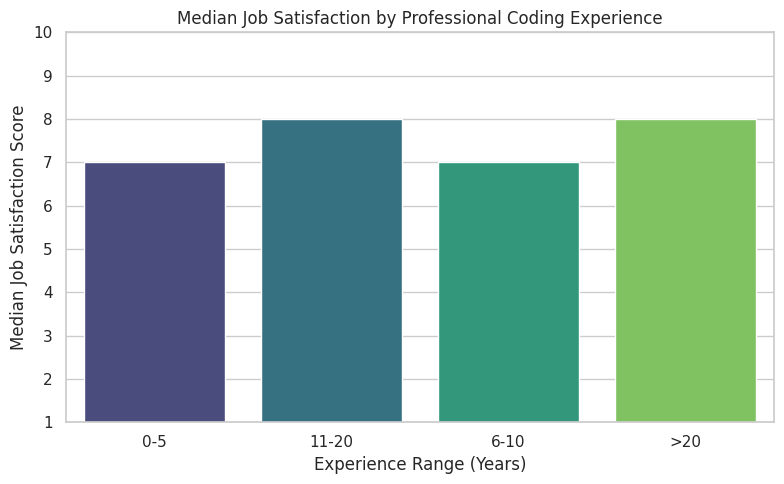

In [60]:
## Write your code here
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0',
    'More than 50 years': '51'
})
df['YearsCodePro'] = df['YearsCodePro'].astype(int)
df['ExperienceRange'] = df['YearsCodePro'].map(lambda x:
    '0-5' if x <= 5 else
    '6-10' if x <= 10 else
    '11-20' if x <= 20 else
    '>20'
)
median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median().reset_index()
print(median_satisfaction)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x='ExperienceRange', y='JobSat', data=median_satisfaction, palette='viridis',hue='ExperienceRange')

plt.title('Median Job Satisfaction by Professional Coding Experience')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Median Job Satisfaction Score')
plt.ylim(1, 10)
plt.tight_layout()
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


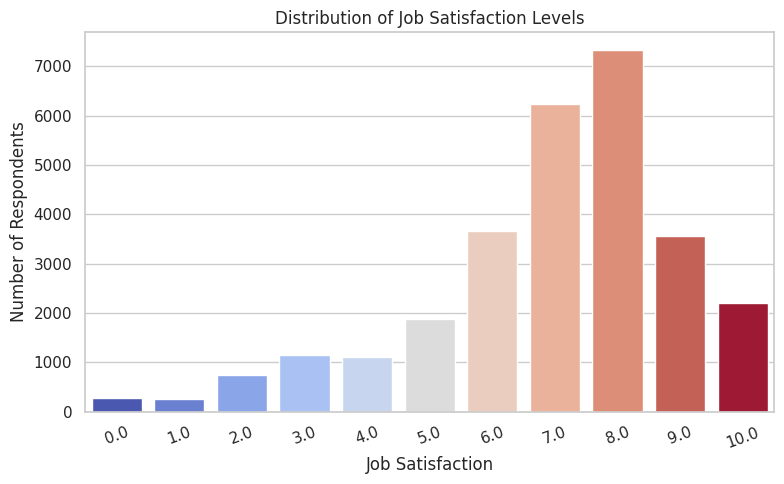

In [61]:
## Write your code here
sns.set(style="whitegrid")

# Create the count plot
plt.figure(figsize=(8, 5))
sns.countplot(x='JobSat', data=df, palette='coolwarm', hue = 'JobSat', legend=False)

# Add titles and labels
plt.title('Distribution of Job Satisfaction Levels')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


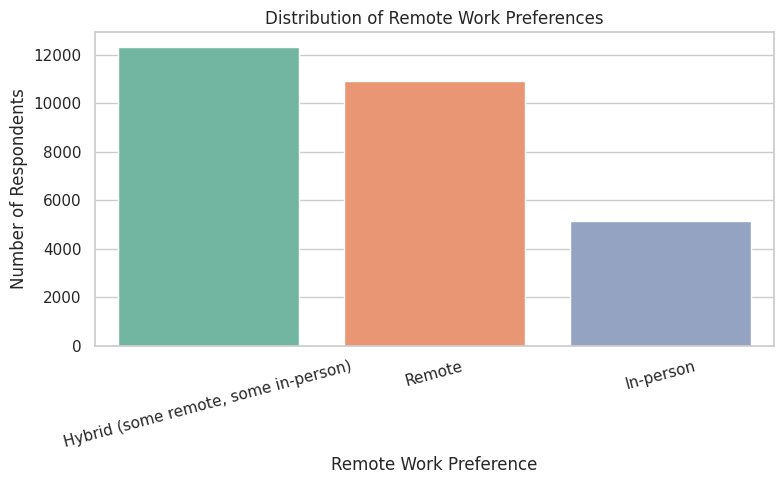

Employment,"Employed, full-time","Employed, full-time;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed","Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Not employed, and not looking for work","Employed, full-time;Not employed, but looking for work","Employed, full-time;Not employed, but looking for work;Employed, part-time","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Not employed, but looking for work;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Retired","Employed, full-time;Student, full-time","Employed, full-time;Student, full-time;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time;Retired","Employed, full-time;Student, full-time;Not employed, but looking for work","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time;Employed, part-time;Retired","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Student, part-time","Employed, full-time;Student, full-time;Student, part-time","Employed, full-time;Student, full-time;Student, part-time;Employed, part-time","Employed, full-time;Student, part-time","Employed, full-time;Student, part-time;Employed, part-time","Employed, part-time","Employed, part-time;Retired","Independent contractor, freelancer, or self-employed","Independent contractor, freelancer, or self-employed;Employed, part-time","Independent contractor, freelancer, or self-employed;Employed, part-time;Retired","Independent contractor, freelancer, or self-employed;Not employed, and not looking for work","Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Retired","Independent contractor, freelancer, or self-employed;Retired","Independent contractor, freelancer, or self-employed;Student, part-time","Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Not employed, and not looking for work;Employed, part-time","Not employed, but looking for work;Employed, part-time","Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Employed, part-time","Not employed, but looking for wor

In [72]:
## Write your code here
plt.figure(figsize=(8, 5))
sns.countplot(x='RemoteWork', data=df, palette='Set2', hue='RemoteWork')
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

remote_employment_ct = pd.crosstab(df['RemoteWork'], df['Employment'], normalize='columns') * 100
remote_employment_ct.round(2)

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


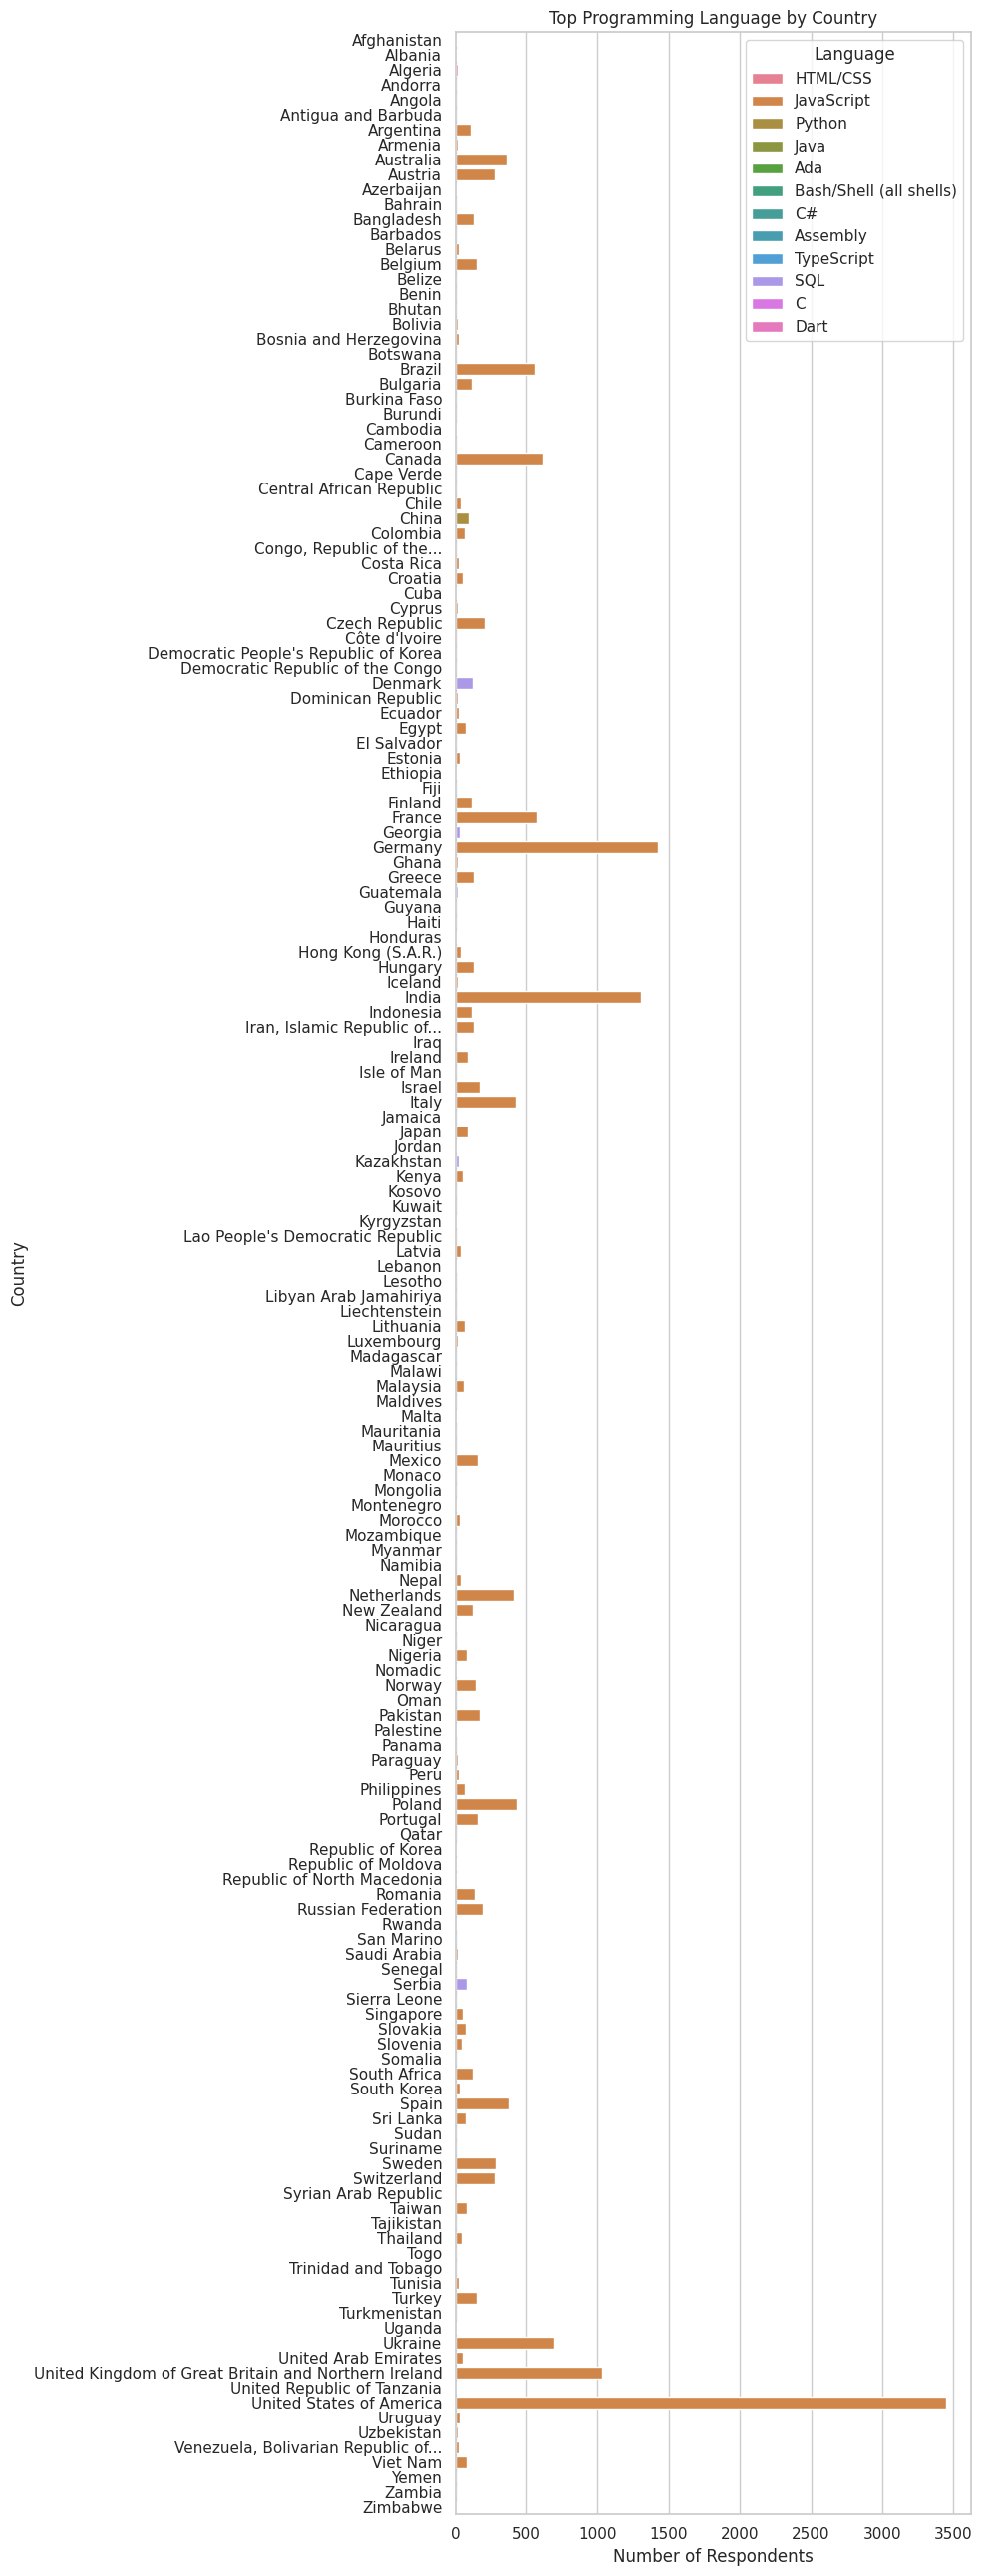

In [102]:
## Write your code here
df = df.dropna(subset=['Country', 'LanguageHaveWorkedWith'])
df_expanded = df.assign(Language=df['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

lang_counts = df_expanded.groupby(['Country', 'Language']).size().reset_index(name='Count')
lang_counts_sorted = lang_counts.sort_values(['Country', 'Count'], ascending=[True, False])

top_language_by_country = lang_counts_sorted.drop_duplicates(subset='Country', keep='first')
top_language_by_country.reset_index(drop=True)

plt.figure(figsize=(10, 26))
sns.barplot(data=top_language_by_country, y='Country', x='Count', hue='Language', dodge=False)
plt.title('Top Programming Language by Country')
plt.xlabel('Number of Respondents')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


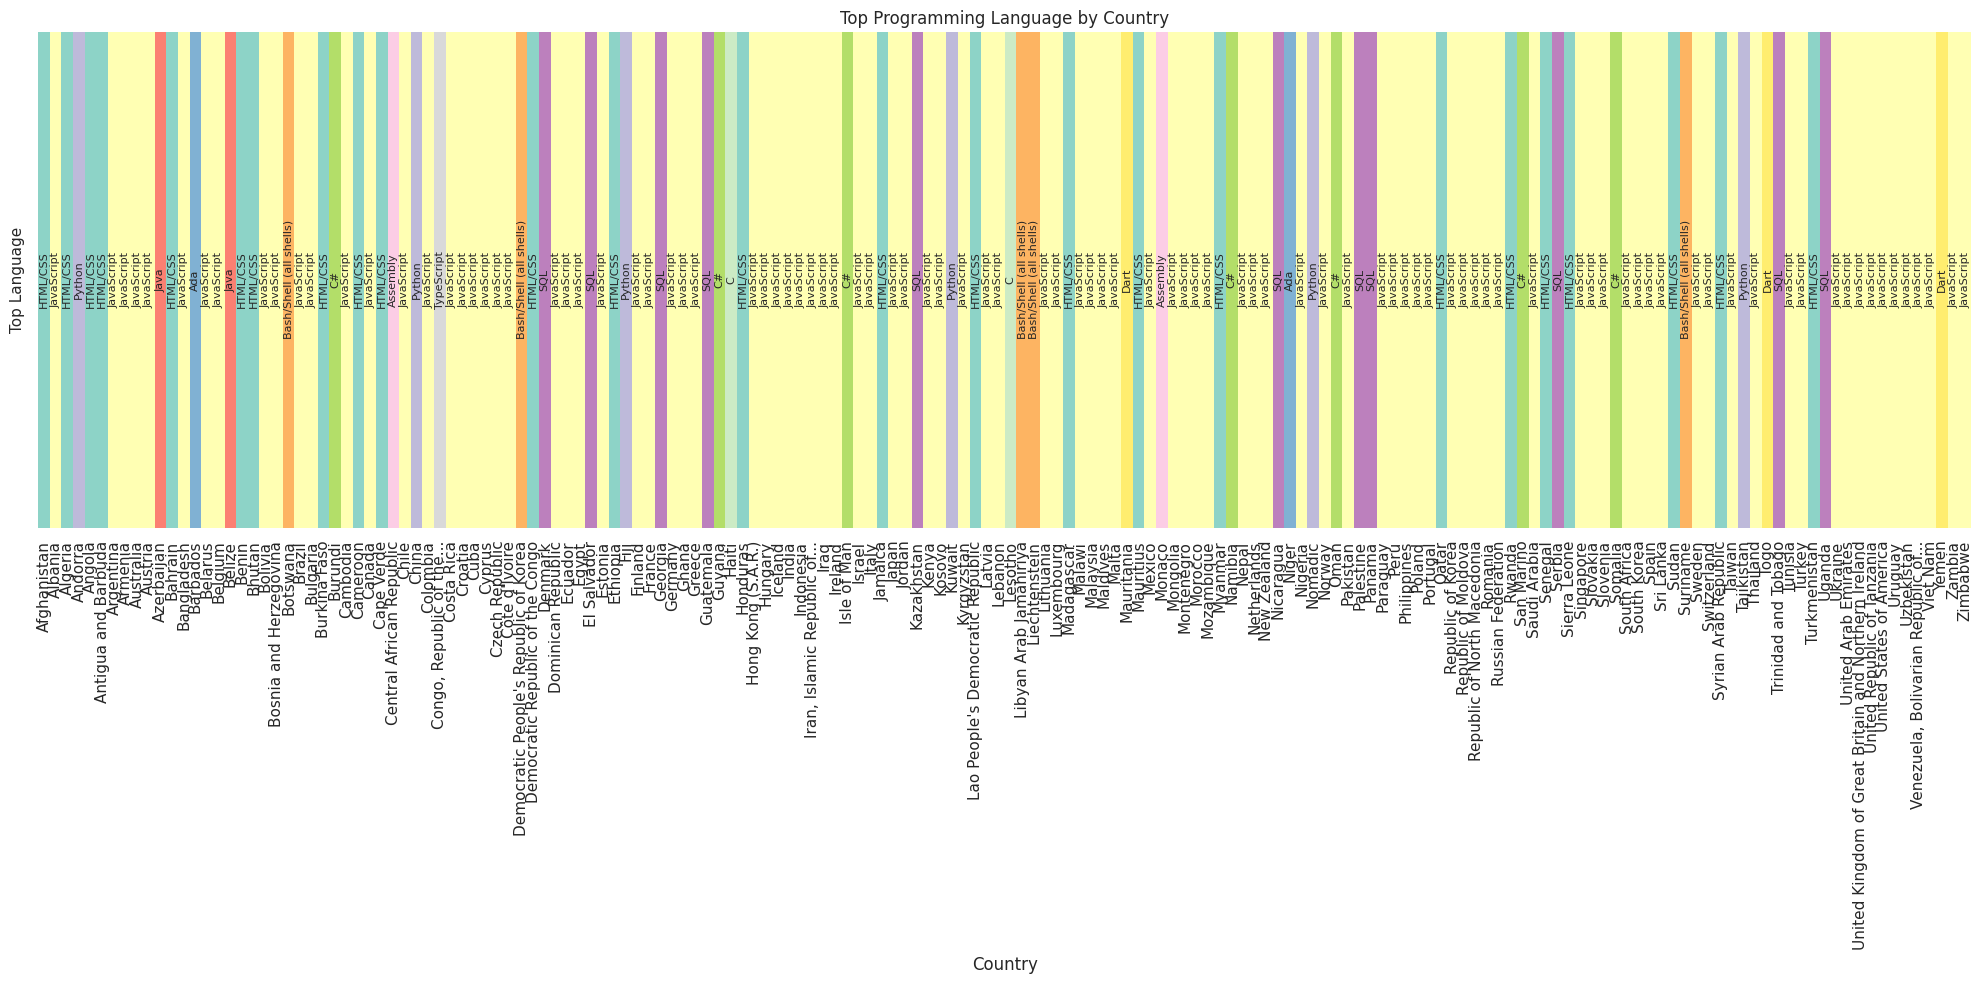

In [111]:
heatmap_df = top_language_by_country.set_index('Country')[['Language']]

# Map each language to an integer code for visualization
lang_palette = {lang: i for i, lang in enumerate(heatmap_df['Language'].unique())}
heatmap_encoded = heatmap_df['Language'].map(lang_palette).to_frame()

# Create a color palette
colors = sns.color_palette("Set3", n_colors=len(lang_palette))
plt.figure(figsize=(20,10 ))
sns.heatmap(heatmap_encoded.T, 
            cmap=colors, 
            cbar=False, 
            xticklabels=heatmap_encoded.index, 
            yticklabels=['Top Language'])
# Add actual language labels above the heatmap cells
for i, country in enumerate(heatmap_encoded.index):
    plt.text(i + 0.5, 0.5, heatmap_df.loc[country, 'Language'], 
             ha='center', va='center', fontsize=8, rotation=90)

plt.xticks(rotation=90)
plt.title('Top Programming Language by Country')
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


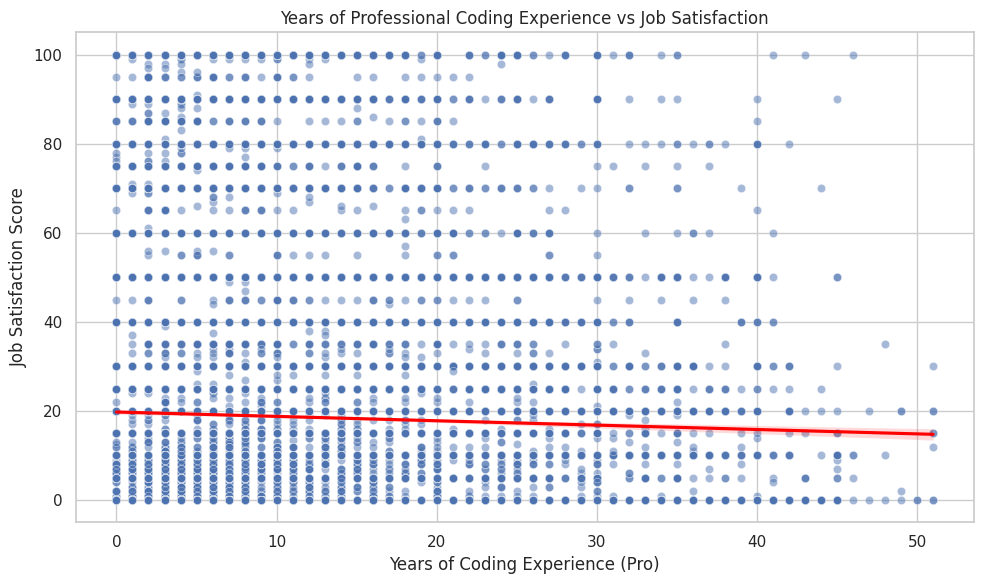

In [114]:
## Write your code here
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='YearsCodePro', y='JobSatPoints_1', alpha=0.5)

# Optional trend line
sns.regplot(data=df, x='YearsCodePro', y='JobSatPoints_1', scatter=False, color='red')

plt.title('Years of Professional Coding Experience vs Job Satisfaction')
plt.xlabel('Years of Coding Experience (Pro)')
plt.ylabel('Job Satisfaction Score')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


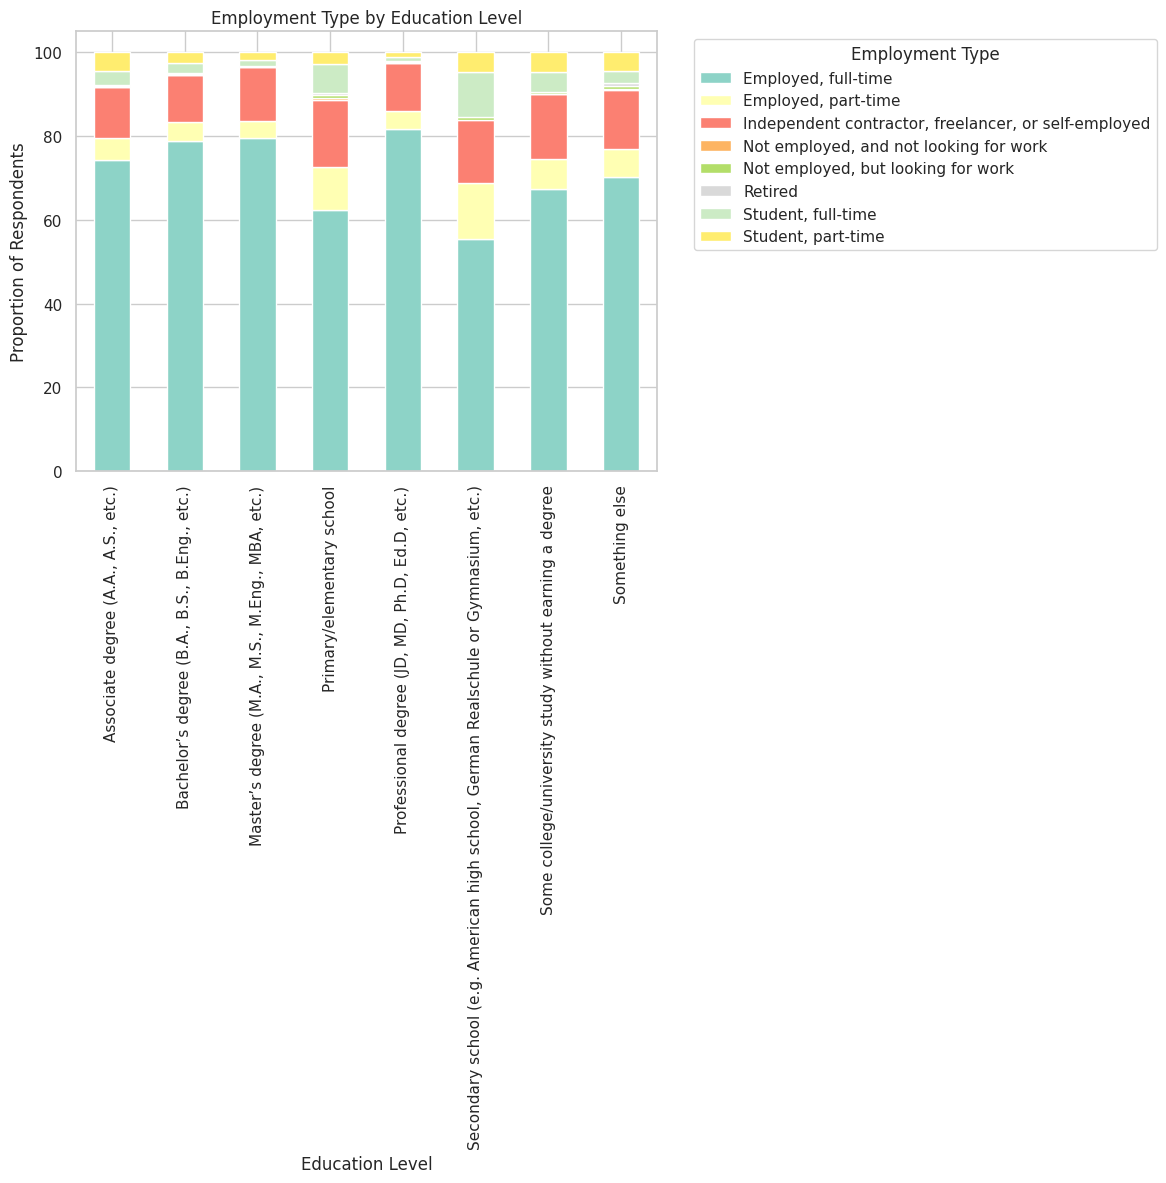

In [134]:
## Write your code here
df = df.dropna(subset=['EdLevel', 'Employment'])

df_expanded = df.assign(EmplmtType=df['Employment'].str.split(';')).explode('EmplmtType')

emplmt_counts = df_expanded.groupby(['EdLevel', 'EmplmtType']).size().reset_index(name='Count')

emplmt_counts_sorted = emplmt_counts.sort_values(['EdLevel', 'Count'], ascending=[True, False])

top_emplmt_by_country = emplmt_counts_sorted.drop_duplicates(subset='EdLevel', keep='first')
top_emplmt_by_country.reset_index(drop=True)

edu_emp_ct = pd.crosstab(df_expanded['EdLevel'], df_expanded['EmplmtType'],normalize='index') * 100

edu_emp_ct.plot(kind='bar', stacked=True, figsize=(12, 12), colormap='Set3')

plt.title('Employment Type by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Respondents')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

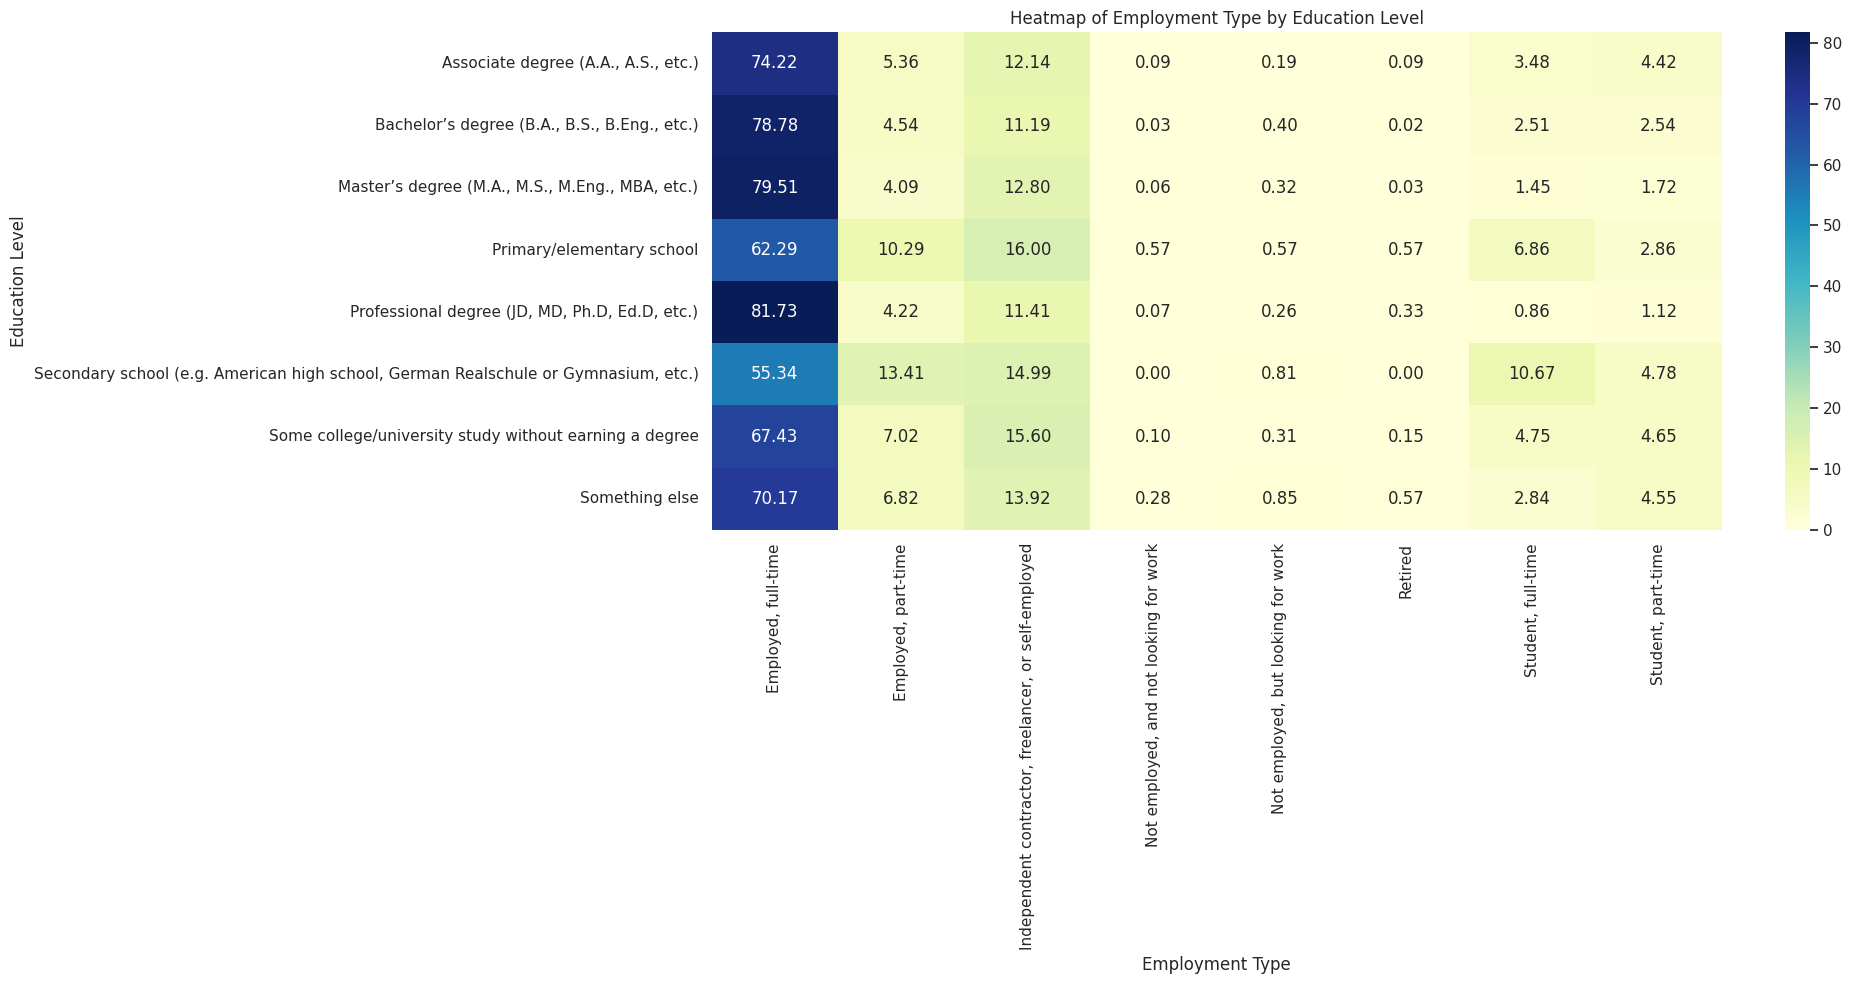

EmplmtType,"Employed, full-time","Employed, part-time","Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,"Student, full-time","Student, part-time"
EdLevel,,,,,,,,
"Associate degree (A.A., A.S., etc.)",74.223895,5.362183,12.135466,0.094073,0.188147,0.094073,3.480715,4.421449
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",78.781991,4.535710,11.188530,0.026799,0.401983,0.020099,2.505695,2.539193
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",79.506519,4.094386,12.800345,0.064648,0.323241,0.032324,1.454585,1.723952
Primary/elementary school,62.285714,10.285714,16.000000,0.571429,0.571429,0.571429,6.857143,2.857143
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",81.728232,4.221636,11.411609,0.065963,0.263852,0.329815,0.857520,1.121372
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",55.335366,13.414634,14.989837,0.000000,0.813008,0.000000,10.670732,4.776423
Some college/university study without earning a degree,67.425527,7.023492,15.596997,0.096876,0.314846,0.145314,4.746912,4.650036
Something else,70.170455,6.818182,13.920455,0.284091,0.852273,0.568182,2.840909,4.545455


In [135]:
plt.figure(figsize=(20, 10))
sns.heatmap(edu_emp_ct, annot=True, cmap='YlGnBu', fmt='.2f')

plt.title('Heatmap of Employment Type by Education Level')
plt.xlabel('Employment Type')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()
edu_emp_ct

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [136]:
## Write your code here
df.to_csv('cleaned_survey_data.csv', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
